# Visualizing Data Cleaning using python

In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

## Database Connection 
The code first establishes a connection to a PostgreSQL database named “DataCleaning” on localhost using the psycopg2 library. The username is “postgres”, and the password is hidden for security reasons.

## Data Extraction 
It then uses pandas to execute a SQL query that selects all records from the “datacleaning” table in the database. The result is stored in a DataFrame named df.

In [2]:
try:
    # Connect to your postgres DB
    conn = psycopg2.connect(
        dbname="DataCleaning", 
        user="postgres", 
        password="", #Hidden for security
        host="localhost", 
        port="5432"
    )

except Exception as e:
    print("Unable to connect to the database")
    print(e)


## Data Cleaning 
The ‘saleprice’ column in the DataFrame is converted to numeric values, with any errors coerced.

## Data Filtering 
The DataFrame is filtered to include only properties with sale prices between $50,000 and $100,000. The filtered data is stored in df_filtered.

In [3]:
# Use pandas to execute SQL query and store the result in a DataFrame
df = pd.read_sql_query('SELECT * FROM datacleaning', conn)

# Convert 'saleprice' to numeric
df['saleprice'] = pd.to_numeric(df['saleprice'], errors='coerce')

# Filter DataFrame to include only properties with sale prices between $50,000 and $100,000
df_filtered = df[(df['saleprice'] >= 50000) & (df['saleprice'] <= 100000)]

/var/folders/fs/k5g2qs7d3sv6p4b7blz3xqbr0000gn/T/ipykernel_44196/3757747823.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query('SELECT * FROM datacleaning', conn)


## Graph 1: 
Distribution of Sale Prices This histogram shows the distribution of sale prices for properties within the $50k - $100k range. The x-axis represents the sale price, and the y-axis represents the frequency of properties sold at that price. The bin width is set to $5000, meaning each bar represents a $5000 range of sale prices.

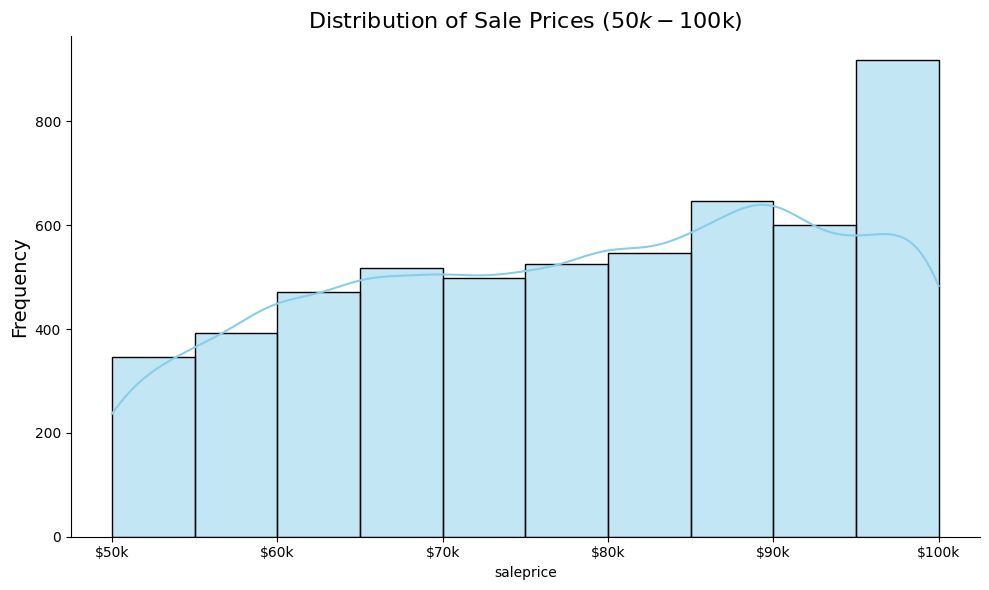

In [4]:
# Distribution of sale prices
plt.figure(figsize=(10,6))
ax = sns.histplot(df_filtered['saleprice'], kde=True, color='skyblue', binwidth=5000)
plt.title('Distribution of Sale Prices ($50k - $100k)', fontsize=16)
plt.ylabel('Frequency', fontsize=14)
plt.xticks([50000, 60000, 70000, 80000, 90000, 100000], ['$50k', '$60k', '$70k', '$80k', '$90k', '$100k'], fontsize=10)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
sns.despine()
plt.tight_layout()
plt.show()

## Graph 2: 
Count of Properties Sold as Vacant This bar chart shows the number of properties sold as vacant or not. The x-axis represents whether the property was sold as vacant, and the y-axis represents the number of properties.

/var/folders/fs/k5g2qs7d3sv6p4b7blz3xqbr0000gn/T/ipykernel_44196/2585481402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='soldasvacant', data=df, palette="viridis")


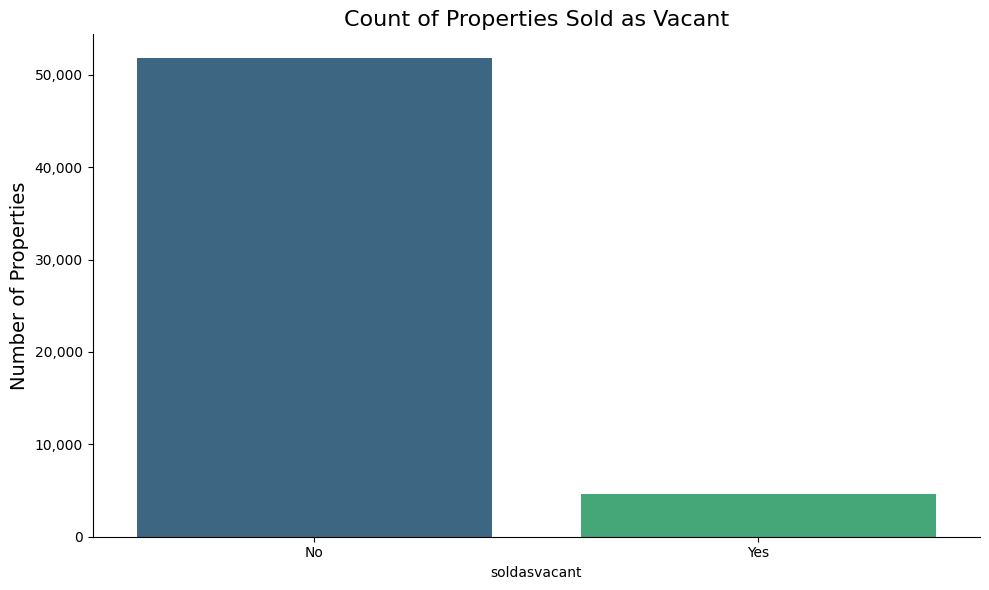

In [5]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='soldasvacant', data=df, palette="viridis")
plt.title('Count of Properties Sold as Vacant', fontsize=16)
plt.ylabel('Number of Properties', fontsize=14)
plt.xticks(fontsize=10)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
sns.despine()
plt.tight_layout()
plt.show()


## Graph 3: 
Number of Properties in Each City This bar chart shows the number of properties in each city, limited to the top 10 cities. The x-axis represents the city, and the y-axis represents the number of properties in that city.

/var/folders/fs/k5g2qs7d3sv6p4b7blz3xqbr0000gn/T/ipykernel_44196/250103376.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")


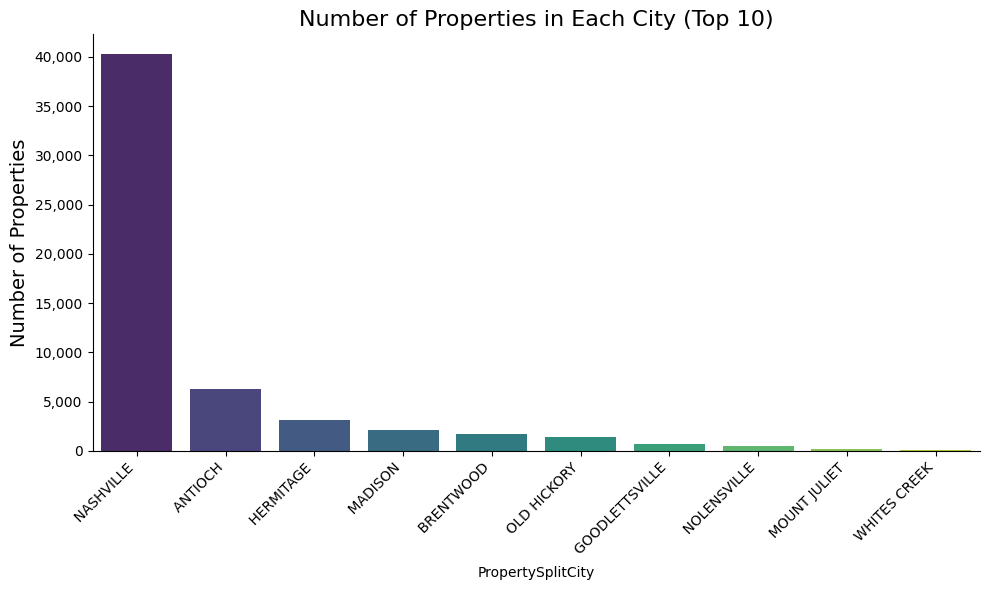

In [6]:
city_counts = df['PropertySplitCity'].value_counts()
city_counts = city_counts[:10]  # Limit to top 10 cities
plt.figure(figsize=(10,6))
ax = sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")
plt.title('Number of Properties in Each City (Top 10)', fontsize=16)
plt.ylabel('Number of Properties', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
sns.despine()
plt.tight_layout()
plt.show()
